In [2]:
import numpy as np
import pandas as pd
import datetime
import dateutil
import matplotlib.pyplot as plt
import electric_rates as er
import solar
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Solar production


In [3]:
pv_model = solar.solar_data()
pv_model.ingest_pvwatts_csv("pvwatts_hourly--v2raw.csv")
pv_actual = solar.solar_data()
pv_actual.ingest_daily_production_enlightenmanager_csv("813892_system_energy_20160110_to_20160312.csv")

In [4]:
pv_model_daily_energy = pv_model.export_daily_energy_from_pvwatts()
pv_actual_daily_energy = pv_actual.export_daily_energy_from_enlightenmanager()


In [5]:
model_vs_actual = pd.merge( pv_model_daily_energy, pv_actual_daily_energy, left_index=True, right_index=True )
model_vs_actual.columns = ['model','actual']

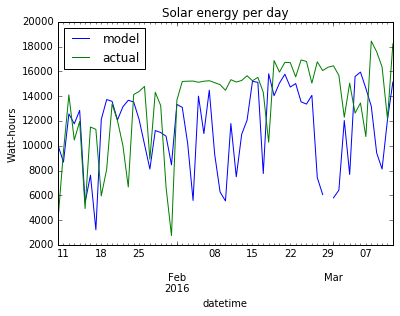

In [6]:
ax1 = model_vs_actual.plot( title="Solar energy per day")
ax1.set_ylabel("Watt-hours")

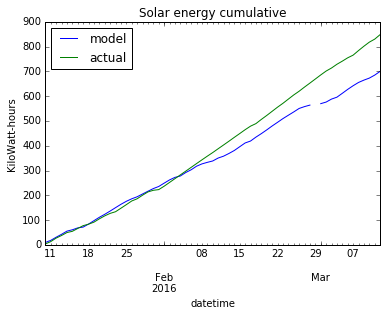

In [7]:
model_vs_actual_cumulative = model_vs_actual.cumsum( axis=0 ) / 1000.0
ax2 = model_vs_actual_cumulative.plot( title="Solar energy cumulative" )
ax2.set_ylabel("KiloWatt-hours")

In [8]:
percent_diff = (model_vs_actual_cumulative['actual'][-1] - model_vs_actual_cumulative['model'][-1]) /  model_vs_actual_cumulative['model'][-1] * 100
print " Production is "+str(percent_diff)+"  different (+ higher, - lower) than expected"

 Production is 21.1519134141  different (+ higher, - lower) than expected
